In [1]:
import os
import sys

import numpy as np

import pyda

sys.path.insert(0, os.path.abspath('../'))

from pyda.tsdata import TSData
from pyda.dsp.spectral import psd
import numpy

FigSize = (15,10) # global setting for figure size



In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [3]:
import lpsd

ts = TSData.randn(nsecs=10000, fs=10, name='ts1', yunits='m')
print(ts.xdata())
print(ts.fs())

psd(ts)


[0.0000e+00 1.0000e-01 2.0000e-01 ... 9.9997e+03 9.9998e+03 9.9999e+03]
10.0
Processing PSD with segments of length 100000 and overlap of 50000.0 samples (50%)
<class 'pyda.utils.unit.Unit'>


In [4]:


Sxx = psd(ts, navs=60, window='BH92')

# Pxx = lpsd.lpsd_trad(ts.ydata(), ts.fs(), olap, bmin, Lmin, Jdes, Kdes, order, numpy.blackman, None, True)
import pandas
d = pandas.DataFrame(data=ts.ydata(), index=pandas.Series(ts.xdata(), name='Time (s)'), columns=['Data'])
print(d)

Processing PSD with segments of length 4762 and overlap of 3147.0 samples (66.1%)
<class 'pyda.utils.unit.Unit'>
              Data
Time (s)          
0.0      -0.854908
0.1      -0.328056
0.2       1.018150
0.3      -0.894058
0.4       0.210929
...            ...
9999.5   -4.846826
9999.6   -0.235432
9999.7    0.224316
9999.8    3.284914
9999.9    0.678309

[100000 rows x 1 columns]


In [5]:

bmin = 1
Lmin = 0
Jdes = 1000
Kdes = 100
order = 2
olap = 50
win  = numpy.blackman

Sxxl = pyda.dsp.spectral.logpsd(ts, window_function=win, psll=200, olap=olap, bmin=bmin, Lmin=Lmin, Jdes=Jdes, Kdes=Kdes, order=order, scale='PSD')


* computing lpsd of ts1 ...


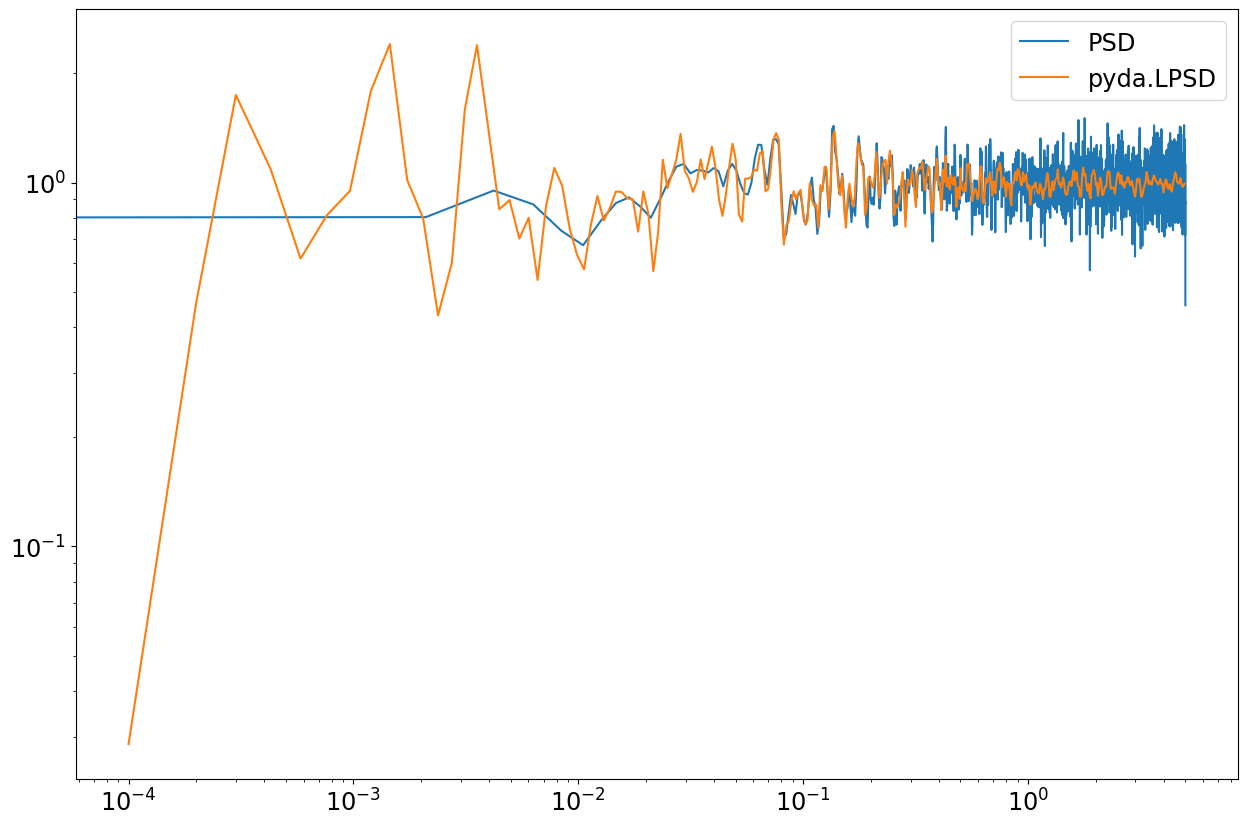

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.loglog(Sxx.xdata(), Sxx.ydata(), label='PSD')
plt.loglog(Sxxl.xdata(), Sxxl.ydata(), label='pyda.LPSD')
plt.legend()

In [7]:
import ctypes as ct
